In [1]:
#testGetFullDF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import yahoo_fin.stock_info as yf
import numpy as np
from stage import getStage, fullPrint
import pickle
from datetime import datetime
now = datetime.now()
import matplotlib.pyplot as plt

In [ ]:
#test_train_test_split
nasdaqList = yf.tickers_nasdaq()
train, test = train_test_split(nasdaqList, test_size=0.3, random_state=0, shuffle=True)
print(train)
print(test)


In [5]:
dfSorted = pd.read_pickle("stockData/nyseNasdaq/AAPL.pkl")
dfSorted.to_csv("sampleDfSorted.csv")

In [11]:
transactionFit = pd.read_pickle("transactionTemplate.pkl")
transactionFit['holding'] = np.empty((len(transactionFit), 0)).tolist()
transactionFitCopy = transactionFit
transactionFitCopy['total'] = 0
transactionFitCopy.to_csv("transactionTemplateCopy.csv")

In [1]:
SectorDict = {
    "Energy":"XLE","Technology":"XLK",
    "Communication Services":"XLC",
    "Consumer Staples":"XLP",
    "Health Care":"XLV",
    "Consumer Cyclical":"XLY",
    "Industrial":"XLI",
    "Utilities":"XLU",
    "Materials":"XLB",
    "Financial":"XLF",
    "Real Estate":"XLRE"}
sectorDfList = []
for sector in SectorDict.values():
    sectorDfList.append(pd.read_pickle("stockData/sectorCharts/"+sector+".pkl"))
    goodSectorDf = sectorDfList[0].drop(['open','high','low','adjclose','close','ticker','volume','percent','MA30','MA30Slope','RS'],axis=1)
    goodSectorDf['Sectors'] = [[] for _ in range(len(goodSectorDf))]
    goodSectorDf.index = sectorDfList[0].index
    index = 0
    for date in sectorDfList[0].index:
        listOfSector = []
        for df in sectorDfList:
            try:
                # print(df.at[date,'MA30Slope'],df.at[date,'RS'])
                # print(individual[0][9],individual[0][10])
                if  df.at[date,'MA30Slope'] > 0 or df.at[date,'RS'] > 0.1:
                    # if df.at[date,'close'] > df.at[date,'MA30']:
                        # print(df.at[date,'ticker'])
                    listOfSector.append(df.at[date,'ticker'])
            except:
                listOfSector.append(df.iat[-1,6]) 
                pass
            # print(listOfSector)
        goodSectorDf.iat[index,0] = set(listOfSector)
        index = index + 1
stockDataTickerList = pd.read_pickle("stockData/tickerList.pkl")
removeList = []
from stage import getStage
for ticker in stockDataTickerList:
    try:
        getStage(ticker,[0.9630183179676801, 1.3518854933368092, 0.16319993430933552, 1.0537971763840923, 1.006835620568861, 1.0103606174928899, 0.9033455933504492, 0.9731546594459972, 1.46426124905874, 0.9991612063815158, 0.09863994265206354, 0.9826811057391516, 0.9949684774619274, 0.8670538938494661, 0.9895837713208671],goodSectorDf)
    except:
        print(ticker)
        removeList.append(ticker)

DAVE
DPRO
FICV
GBNH
HCVIW
NHICW
PBAXW
PEGRW
PRLHW
RDIB
SAMAW
SANG
SCMAW
SMAPW
USCTW
VMGAW
ZIONP


In [2]:
for ticker in removeList:
    stockDataTickerList.remove(ticker)
for ticker in removeList:
    if ticker in stockDataTickerList:
        print("Broken")

In [3]:
with open('stockData/tickerList.pkl', 'wb') as f:
    pickle.dump(stockDataTickerList, f)

In [2]:
getStage("AFRM",[0.03361077383204303, 1.7466372328111242, -0.08498841770875612, 0.926192276854965, 1.1764676012556523, 1.1405501342698643, 0.8517616225271734, 0.8691969716399011, 1.268490629719207, 1.0013386634337298, 0.07551020458494859, 0.9489349345040117, 0.996709764664632, 0.9485725801058837, 0.9857019510456804],goodSectorDf)

In [21]:
df = pd.read_pickle("transactionTemplate.pkl")
df.to_csv("transactionTemplate.csv")


In [6]:
now = datetime.now()
yf.get_data('AAPL', start_date="1995-01-06",end_date= now, index_as_date = True).drop(['open','high','low','close','adjclose','volume','ticker'],axis=1).to_csv("AAPL.csv")

In [5]:
def calculateGroupReturn(list):
    monthlyReturn = pd.read_pickle("transactionTemplate.pkl")
    monthlyReturn = monthlyReturn.resample('M').mean()
    monthlyReturn.index = monthlyReturn.index.strftime("%Y:%m")
    currentColumn = -1
    for symbol in list:
        if symbol in monthlyReturn.columns:
            continue
        try:
            df = pd.read_pickle("stockData/nyseNasdaq/"+symbol+".pkl")
        except:
            print(symbol)
            continue
        if not (df['close'] != 0).all() or df.empty:
            if df.empty:
                print(symbol)
            continue
        monthlyReturn[symbol] = 1
        currentColumn += 1
        monthCheck = df.index[0].strftime("%Y:%m")
        lastPrice = df.iat[0,0]
        initialPrice = df.iat[0,0]
        for index, element in df.iterrows():
            if (index.strftime("%Y:%m") != monthCheck):
                if (initialPrice == 0): continue
                if (lastPrice / initialPrice >= 1.01 and lastPrice / initialPrice < 2):
                    rowNumber = monthlyReturn.index.get_loc(index.strftime("%Y:%m"))
                    monthlyReturn.iat[rowNumber, currentColumn] = (lastPrice / initialPrice)
                initialPrice = element[0]
                lastPrice = element[0]
                monthCheck = index.strftime("%Y:%m")
            lastPrice = element[0]
    return monthlyReturn


In [6]:
## Get list of returns of tickers
nasdaqList = pd.read_pickle("stockData/tickerList.pkl")
listOfDf = calculateGroupReturn(nasdaqList)

/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

CONE


/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [33]:
## Initialize Test/Train Stock Lists and Check test vs train return
train, test = train_test_split(nasdaqList, test_size=0.3, shuffle=True)
testTrainR = []
def calculateTestTrainRatio(train,test):
    testTrainRatio = [1,1]
    for i in range(2):
        if i == 0:
            l = test
        else:
            l = train
        index = 0
        while index != len(l):
            if l[index] not in listOfDf.columns:
                l = np.delete(l, index)
            else:
                index += 1
        for index, element in listOfDf[l].iterrows():
            #print(element.to_list())
            listOfStockRet = element.to_list()
            while 1.0 in listOfStockRet:
                listOfStockRet.remove(1.0)
            if len(listOfStockRet) != 0:
                testTrainRatio[i] = testTrainRatio[i] * np.mean(listOfStockRet)     
    testTrainRatio[1] = testTrainRatio[1] / testTrainRatio[0]
    testTrainRatio[0] = 1
    return testTrainRatio
testTrainR = calculateTestTrainRatio(train,test)
while(abs(1-testTrainR[1])/np.average(testTrainR)>0.2):
    train, test = train_test_split(nasdaqList, test_size=0.3, shuffle=True)
    testTrainR = calculateTestTrainRatio(train,test)
print(testTrainR)

[1, 1.070530087902173]


In [32]:
np.random.shuffle(train)
## Calculate (and normalize) returns of each folds 
trainSet1, trainSet2, trainSet3  = np.array_split(train,3,)
trainSets = [trainSet1, trainSet2, trainSet3]
trainSetsR = []
def trainSetsRatio(ratio):
    ratio = [1,1,1,1,1,1]
    for i in range(6):
        if i < 3:
            l = trainSets[i]
        else:
            l = np.concatenate((trainSets[(i+1)%3],trainSets[(i+2)%3]))
        index = 0
        while index != len(l):
            if l[index] not in listOfDf.columns:
                l = np.delete(l, index)
            else:
                index += 1
        for index, element in listOfDf[l].iterrows():
            #print(element.to_list())
            listOfStockRet = element.to_list()
            while 1.0 in listOfStockRet:
                listOfStockRet.remove(1.0)
            if len(listOfStockRet) != 0:
                ratio[i] = ratio[i] * np.mean(listOfStockRet)     
    for i in range(1,6):
        ratio[i] = ratio[i] / ratio[0]
    ratio[0] = 1.0
    return ratio
trainSetsR = trainSetsRatio(trainSetsR)
while(np.std(trainSetsR)/np.average(trainSetsR)>0.2):
        np.random.shuffle(train)
        trainSet1, trainSet2, trainSet3  = np.array_split(train,3)
        trainSets = [trainSet1, trainSet2, trainSet3]
        trainSetsR = trainSetsRatio(trainSetsR)
print(np.std(trainSetsR)) 
print(np.std(trainSetsR)/np.average(trainSetsR))
print(trainSetsR)

0.11606880806772112
0.12620387153796947
[1.0, 1.0421964479476165, 0.7176111432736034, 0.8732677252719678, 0.8549653176419437, 1.0301169304432674]


In [4]:
spDf = yf.get_data('^IXIC', start_date="1995-01-06",end_date = now, index_as_date = True)
print(spDf)

                    open          high           low         close  \
1995-01-06    746.270020    750.729980    745.760010    749.690002   
1995-01-09    750.190002    752.840027    750.099976    752.090027   
1995-01-10    754.270020    759.219971    754.270020    756.520020   
1995-01-11    758.140015    760.049988    751.700012    755.739990   
1995-01-12    755.659973    757.049988    754.650024    756.510010   
...                  ...           ...           ...           ...   
2022-03-31  14444.780273  14456.740234  14217.719727  14220.519531   
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   

                adjclose      volume ticker  
1995-01-06    749.690002   312920000  ^IXIC  
1995-01-09    752.090027   267090000  ^IXIC  
1995-01-10    756.520

In [3]:
df = pd.read_csv("estimatorTest.csv")

In [5]:
print(df.total)

0         100.000000
1         100.000000
2         100.000000
3         100.000000
4         100.000000
            ...     
1368    42421.548386
1369    42421.548386
1370    42421.548386
1371    42421.548386
1372    42421.548386
Name: total, Length: 1373, dtype: float64


<AxesSubplot:>

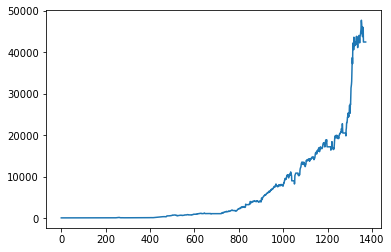

In [6]:
df.total.plot()

In [7]:
df = pd.read_pickle("0.12670742563044157.pkl")
total = 100
gold = yf.get_data("GC=F", start_date="1995-01-06",end_date = now, index_as_date = True)
bearish = False
prevGoldPrice = 0
for index, element in df.iterrows():
    try:
        goldPrice = gold.loc[index].close
        if goldPrice != goldPrice:
            continue
        if len(element.holding) == 0:
            if bearish == False:
                bearish = True
            else:
                total = total*(goldPrice/prevGoldPrice)
        else:
            if bearish == True:
                total = total*(goldPrice/prevGoldPrice)
                bearish = False
        prevGoldPrice = gold.loc[index].close
        df.at[index,"goldTotal"] = total
        print(index, goldPrice, total,bearish)
    except:
        continue

fullPrint(df["goldTotal"])
df["goldTotal"].plot()
# print(df["total"])



TypeError: no numeric data to plot